In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv(r'./score_card/cs-training.csv')
df_train

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
df_train = df_train.iloc[:,1:]
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


0.06684


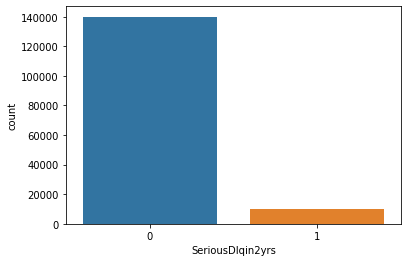

In [4]:
#SeriousDlqin2yrs 违约率可视化
sns.countplot(x='SeriousDlqin2yrs',data=df_train)
print('{}'.format(df_train['SeriousDlqin2yrs'].sum()/len(df_train)))

In [5]:
# 缺失值比例
null_num = df_train.isnull().sum()
pd.DataFrame({'列名':null_num.index,'缺失值个数':null_num.values,'比例':null_num.values/len(df_train)})

,列名,缺失值个数,比例
0,SeriousDlqin2yrs,0,0.000000
1,RevolvingUtilizationOfUnsecuredLines,0,0.000000
2,age,0,0.000000
3,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
4,DebtRatio,0,0.000000
5,MonthlyIncome,29731,0.198207
6,NumberOfOpenCreditLinesAndLoans,0,0.000000
7,NumberOfTimes90DaysLate,0,0.000000
8,NumberRealEstateLoansOrLines,0,0.000000
9,NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


In [6]:
df_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines'>

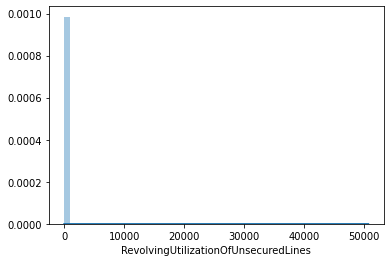

In [7]:
#直方图分布
sns.distplot(df_train['RevolvingUtilizationOfUnsecuredLines'])

In [8]:
#缺失值填充（使用中位数填充）
df_train = df_train.fillna(df_train.median())
df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

## 评分卡模型
评分卡模型开发步骤：
Step1，数据获取，包括获取存量客户及潜在客户的数据存量客户，已开展融资业务的客户，包括个人客户和机构客户；潜在客户，将要开展业务的客户
Step2，EDA，获取样本整体情况，进行直方图、箱形图可视化
Step3，数据预处理，包括数据清洗、缺失值处理、异常值处理
Step4，变量筛选，通过统计学的方法，筛选出对违约状态影响最显著的指标。主要有单变量特征选择和基于机器学习的方法
Step5，模型开发，包括变量分段、变量的WOE（证据权重）变换和逻辑回归估算三个部分
Step6，模型评估，评估模型的区分能力、预测能力、稳定性，并形成模型评估报告，得出模型是否可以使用的结论
Step7，生成评分卡（信用评分），根据逻辑回归的系数和WOE等确定信用评分的方法，将Logistic模型转换为标准评分的形式
Step8，建立评分系统（布置上线），根据生成的评分卡，建立自动信用评分系统

相应流程图如下所示：

In [9]:
%%html
<img src='1.jpg', width=50%>

WOE编码：
Weight of Evidence，证据权重，是自变量的一种编码，常用于特征变换用来衡量自变量与因变量的相关性。woe计算公式如下：
$$
w o e_{i}=\ln \left(\frac{\text { Event } \%}{\text { Not Event } \%}\right)=\ln \left(\frac{\# B_{i} / \# B_{T}}{\# G_{i} / \# G_{T}}\right)
$$
下标T代表的是Total，B代表风险客户，G代表正常客户。$# B_{i}$代表$B_{i}$的数量，其他类似。一般来说，差异越大，对风险区分越明显。在对连续型变量计算woe时，需要对变量进行分箱。然后在按照上面的公式计算。
IV（Information Value）：
IV衡量一个变量的风险区分能力,即衡量各变量对y的预测能力，用于筛选变量。
$$
\begin{array}{l}
I V_{i}=(\text { Event } \%-\text {Not Event\%}) * \ln \left(\frac{\text {Event} \%}{\text {Not Event } \%}\right) \\
=\left(\frac{\# B_{i}}{\# B_{T}}-\frac{\# G_{i}}{\# G_{T}}\right) * \ln \left(\frac{\# B_{i} / \# B_{T}}{\# G_{i} / \# G_{T}}\right) \\
I V=\sum_{k=0}^{n} I V_{i}
\end{array}
$$
从上面公式可以看出，IV的计算，可以认为是WOE的加权和。

我们可以对变量计算相应的IV值，并根据下标筛选变量：
$$
\begin{array}{|c|c|}
\hline \text { IV范围 } & \text { 变量评估（预测效果） } \\
\hline \text { 小于0.02 } & \text { 几平没有 } \\
\hline 0.02^{\sim} 0.1 & \text { 弱 } \\
\hline 0.1^{\sim} 0.3 & \text { 中等 } \\
\hline 0.3^{\sim} 0.5 & \text { 强 } \\
\hline \text { 大于0.5 } & \text { 难以置信, 需要确认 } \\
\hline
\end{array}
$$
一般，情况下选择IV值大于0.1的变量。

## 数据分箱

In [10]:
#对于age字段，分成6段[-math.inf,25,40,50,60,70,math.inf]
import math
ages_bins = [-math.inf,25,40,50,60,70,math.inf]
df_train['bin_age'] = pd.cut(df_train['age'],bins=ages_bins)
df_train[['bin_age','age']]

,bin_age,age
0,"(40.0, 50.0]",45
1,"(25.0, 40.0]",40
2,"(25.0, 40.0]",38
3,"(25.0, 40.0]",30
4,"(40.0, 50.0]",49
...,...,...
149995,"(70.0, inf]",74
149996,"(40.0, 50.0]",44
149997,"(50.0, 60.0]",58
149998,"(25.0, 40.0]",30


In [11]:
#对NumberOfDependents（家属人数）进行分割 [-math.inf,25,40,50,60,70,math.inf]
dependent_bin = [-math.inf,2,4,6,8,10,math.inf]
df_train['bin_NumberOfDependents'] = pd.cut(df_train['NumberOfDependents'],dependent_bin)
df_train[['bin_NumberOfDependents','NumberOfDependents']]

,bin_NumberOfDependents,NumberOfDependents
0,"(-inf, 2.0]",2.0
1,"(-inf, 2.0]",1.0
2,"(-inf, 2.0]",0.0
3,"(-inf, 2.0]",0.0
4,"(-inf, 2.0]",0.0
...,...,...
149995,"(-inf, 2.0]",0.0
149996,"(-inf, 2.0]",2.0
149997,"(-inf, 2.0]",0.0
149998,"(-inf, 2.0]",0.0


In [12]:
#对三种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate进行分割
# [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
dpd_bin = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'],dpd_bin)
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'],dpd_bin)
df_train['bin_NumberOfTimes90DaysLate'] = pd.cut(df_train['NumberOfTimes90DaysLate'],dpd_bin)

In [13]:
#对RevolvingUtilizationOfUnsecuredLines，DebtRatio，MonthlyIncome，NumberOfOpenCreditLinesAndLoans，NumberRealEstateLoansOrLines
#采用等频的方式进行分割
df_train['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'],q=5,duplicates='drop')
df_train['bin_DebtRatio'] = pd.qcut(df_train['DebtRatio'],q=5,duplicates='drop')
df_train['bin_MonthlyIncome'] = pd.qcut(df_train['MonthlyIncome'],q=5,duplicates='drop')
df_train['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'],q=5,duplicates='drop')
df_train['bin_NumberRealEstateLoansOrLines'] = pd.qcut(df_train['NumberRealEstateLoansOrLines'],q=5,duplicates='drop')

In [14]:
# 统计分箱字段
bin_cols = [c for c in df_train.columns.values if c.startswith('bin_')]
bin_cols

['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

In [15]:
# 计算IV，衡量自变量的预测能力
def cal_IV(df,feature,target):
    lst = []
    cols = ['Variable','Value','All','Bad']
    for i in range(df[feature].nunique()):#nunique=unique的个数
        val = list(df[feature].unique())[i]
        temp1 = df[df[feature]==val].count()[feature]
        temp2 = df[(df[feature]==val) & (df[target] ==1)].count()[feature]
        lst.append([feature,val,temp1,temp2])
    data = pd.DataFrame(lst,columns=cols)
    data = data[data['Bad']>0]
    data['Share'] = data['All']/data['All'].sum()
    data['Bad Rate'] = data['Bad'] /data['All']
    data['Distribution Bad'] = data['Bad']/data['Bad'].sum()
    data['Distribution Good'] = (data["All"]-data['Bad'])/(data['All'].sum()-data['Bad'].sum())
    data['WOE'] = np.log(data['Distribution Bad']/data['Distribution Good'])
    data['IV'] = (data['Distribution Bad']-data['Distribution Good'])*data['WOE']
    data = data.sort_values(by=['Variable','Value'],ascending=True)
    return data['IV'].sum()

In [16]:
#统计所有字段的IV值
feature_cols = []
for col in bin_cols:
    temp_IV = cal_IV(df_train,col,'SeriousDlqin2yrs')
    print(col,temp_IV)
    if temp_IV > 0.1:
        feature_cols.append(col)

bin_age 0.24041120302785984
bin_NumberOfDependents 0.01450836007644442
bin_NumberOfTime30-59DaysPastDueNotWorse 0.49244477457019803
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887
bin_DebtRatio 0.05948761145809681
bin_MonthlyIncome 0.05623446147714755
bin_NumberOfOpenCreditLinesAndLoans 0.04802315528985505
bin_NumberRealEstateLoansOrLines 0.0120914141106244


In [17]:
feature_cols

['bin_age',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines']

## 选择IV>0.1,筛选出来的变量：
bin_age,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines

In [18]:
#计算字段的WOE特征值
def cal_WOE(df,features,target):
    for feature in features:
        df_woe = df.groupby(feature).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join,df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns= {target+'sum':'bad',target+'count':'all'})
        
        df_woe['good'] = df_woe['all'] - df_woe['bad']
        df_woe = df_woe[[feature,'good','bad']]
        df_woe['bad_rate'] = df_woe['bad']/df_woe['bad'].sum()
        df_woe['good_rate'] = df_woe['good']/df_woe['good'].sum()
        #计算woe
        df_woe['woe'] = np.log1p(df_woe['bad_rate'].divide(df_woe['good_rate']))
        # 在后面拼接上 _feature，比如_age
        df_woe.columns = [c if c==feature else c+'_'+feature for c in list(df_woe.columns.values)]
        #拼接
        df = df.merge(df_woe,on=feature,how='left')
    return df

In [19]:
# 计算这些特征的WOE
df_woe = cal_WOE(df_train,feature_cols,'SeriousDlqin2yrs')
df_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_NumberOfTimes90DaysLate,bad_bin_NumberOfTimes90DaysLate,bad_rate_bin_NumberOfTimes90DaysLate,good_rate_bin_NumberOfTimes90DaysLate,woe_bin_NumberOfTimes90DaysLate,good_bin_RevolvingUtilizationOfUnsecuredLines,bad_bin_RevolvingUtilizationOfUnsecuredLines,bad_rate_bin_RevolvingUtilizationOfUnsecuredLines,good_rate_bin_RevolvingUtilizationOfUnsecuredLines,woe_bin_RevolvingUtilizationOfUnsecuredLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,138586,8319,0.829743,0.990084,0.608707,24037,5963,0.594754,0.171725,1.495914
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,138586,8319,0.829743,0.990084,0.608707,24037,5963,0.594754,0.171725,1.495914
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,138586,8319,0.829743,0.990084,0.608707,27893,2107,0.210154,0.199273,0.720083
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,138586,8319,0.829743,0.990084,0.608707,29123,877,0.087473,0.208060,0.350952
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,138586,8319,0.829743,0.990084,0.608707,24037,5963,0.594754,0.171725,1.495914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,138586,8319,0.829743,0.990084,0.608707,29503,497,0.049571,0.210775,0.211221
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,138586,8319,0.829743,0.990084,0.608707,27893,2107,0.210154,0.199273,0.720083
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,138586,8319,0.829743,0.990084,0.608707,29123,877,0.087473,0.208060,0.350952
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,138586,8319,0.829743,0.990084,0.608707,29418,582,0.058049,0.210168,0.243890


In [20]:
#得到所有woe字段
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
df_woe[woe_cols]

,woe_bin_age,woe_bin_NumberOfTime30-59DaysPastDueNotWorse,woe_bin_NumberOfTime60-89DaysPastDueNotWorse,woe_bin_NumberOfTimes90DaysLate,woe_bin_RevolvingUtilizationOfUnsecuredLines
0,0.813822,1.797837,0.645352,0.608707,1.495914
1,0.955231,0.572521,0.645352,0.608707,1.495914
2,0.955231,0.572521,0.645352,0.608707,0.720083
3,0.955231,0.572521,0.645352,0.608707,0.350952
4,0.813822,0.572521,0.645352,0.608707,1.495914
...,...,...,...,...,...
149995,0.279404,0.572521,0.645352,0.608707,0.211221
149996,0.813822,0.572521,0.645352,0.608707,0.720083
149997,0.651655,0.572521,0.645352,0.608707,0.350952
149998,0.955231,0.572521,0.645352,0.608707,0.243890


In [21]:
#得到woe规则
feature_cols = ['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines']
df_bin_to_woe = pd.DataFrame(columns=['features','bin','woe'])
for f in feature_cols:
    b = 'bin_' + f
    w = 'woe_bin_' + f
    # 对每个feature 找到相应的bin和woe字段
    df = df_woe[[w,b]].drop_duplicates()
    df.columns = ['woe','bin']
    df['features'] = f
    df = df[['features','bin','woe']]
    df_bin_to_woe = pd.concat([df_bin_to_woe,df])
df_bin_to_woe

,features,bin,woe
0,age,"(40.0, 50.0]",0.813822
1,age,"(25.0, 40.0]",0.955231
5,age,"(70.0, inf]",0.279404
6,age,"(50.0, 60.0]",0.651655
15,age,"(60.0, 70.0]",0.406848
19,age,"(-inf, 25.0]",1.013134
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.797837
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",0.572521
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.151185
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.429111


# 逻辑回归建模

In [22]:
#数据集切分
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_woe[woe_cols],df_woe['SeriousDlqin2yrs'],test_size=0.2)
print('bad rate is',y_train.mean())

bad rate is 0.06673333333333334


In [23]:
from sklearn.linear_model import LogisticRegression
#class_weight='balanced' 自动计算
model = LogisticRegression(random_state=30,class_weight='balanced').fit(x_train,y_train)
print(model.score(x_test,y_test))

0.7989


In [24]:
#求f1值
from sklearn.metrics import f1_score
y_pred = model.predict(x_test)
print(f1_score(y_pred,y_test))

0.3145097148051358


In [25]:
from sklearn.model_selection import cross_val_score
def lr_cv(max_iter,C):
    result = cross_val_score(LogisticRegression(C=C,max_iter=max_iter),x_train,y_train,scoring='f1',cv=5).mean()
    return result

In [26]:
# 使用贝叶斯超参数优化
from bayes_opt import BayesianOptimization
lr_op = BayesianOptimization(
        f = lr_cv,
        pbounds = {'C':(0.01,10),
                  'max_iter':(50,500)
                  }
)
lr_op.maximize()
print(lr_op.max)

|   iter    |  target   |     C     | max_iter  |
-------------------------------------------------
|  1        |  0.2039   |  0.9034   |  119.3    |
|  2        |  0.204    |  7.403    |  383.8    |
|  3        |  0.204    |  5.703    |  417.7    |
|  4        |  0.2039   |  1.906    |  192.6    |
|  5        |  0.2039   |  1.33     |  128.0    |
|  6        |  0.2034   |  0.08887  |  499.8    |
|  7        |  0.204    |  9.296    |  50.13    |
|  8        |  0.204    |  9.838    |  50.3     |
|  9        |  0.204    |  9.688    |  499.8    |
|  10       |  0.204    |  9.987    |  50.51    |
|  11       |  0.204    |  9.869    |  499.5    |
|  12       |  0.204    |  9.79     |  50.36    |
|  13       |  0.204    |  9.749    |  500.0    |
|  14       |  0.2038   |  0.105    |  50.29    |
|  15       |  0.204    |  0.125    |  499.7    |
|  16       |  0.204    |  9.582    |  499.8    |
|  17       |  0.204    |  9.991    |  50.76    |
|  18       |  0.204    |  9.339    |  499.2    |


In [27]:
def lr_accuracy_cv(max_iter,C):
    result = cross_val_score(LogisticRegression(C=C,max_iter=max_iter),x_train,y_train,scoring='accuracy',cv=5).mean()
    return result

In [28]:
lr_accucacy_op = BayesianOptimization(
        f = lr_accuracy_cv,
        pbounds = {'C':(0.01,10),
                  'max_iter':(50,500)
                  }
)
lr_accucacy_op.maximize()
print(lr_accucacy_op.max)

|   iter    |  target   |     C     | max_iter  |
-------------------------------------------------
|  1        |  0.9365   |  5.422    |  365.9    |
|  2        |  0.9365   |  2.823    |  496.5    |
|  3        |  0.9365   |  9.944    |  129.6    |
|  4        |  0.9365   |  4.328    |  149.8    |
|  5        |  0.9364   |  0.8273   |  312.4    |
|  6        |  0.9364   |  0.5194   |  50.28    |
|  7        |  0.9365   |  9.9      |  499.7    |
|  8        |  0.9365   |  9.863    |  50.71    |
|  9        |  0.9365   |  0.06221  |  500.0    |
|  10       |  0.9364   |  0.3127   |  50.68    |
|  11       |  0.9365   |  9.688    |  499.6    |
|  12       |  0.9365   |  9.4      |  50.99    |
|  13       |  0.9365   |  9.544    |  499.9    |
|  14       |  0.9364   |  0.3222   |  50.03    |
|  15       |  0.9364   |  0.2346   |  499.9    |
|  16       |  0.9365   |  9.68     |  50.28    |
|  17       |  0.9365   |  9.932    |  499.4    |
|  18       |  0.9364   |  0.2092   |  51.75    |


In [31]:
# 贝叶斯优化后的模型
model_f1 = LogisticRegression(random_state=30,class_weight='balanced',C=0.125,max_iter=499.7).fit(x_train,y_train)
y_pred_f1 = model_f1.predict(x_test)
print(f1_score(y_pred_f1,y_test))
print(model_f1.score(x_test,y_test))

0.3145097148051358
0.7989


In [32]:
# 贝叶斯优化后的模型
model_acc = LogisticRegression(random_state=30,class_weight='balanced',C=0.06,max_iter=500).fit(x_train,y_train)
y_pred_acc = model_acc.predict(x_test)
print(f1_score(y_pred_acc,y_test))
print(model_acc.score(x_test,y_test))

0.3145097148051358
0.7989


## 评分卡模型转换
设p为客户违约的概率，那么正常的概率为1-p，则
$$
O d d s=\frac{p}{1-p}
$$
评分卡的分值计算，可以通过分值表示为比率对数的线性表达式来定义，即
$$
\text { Score }=A-B * \ln (O d d s)
$$
常数A、B可以通过将两个假设的分值带入计算得到：
1) 基准分, 即给某个特定的比率 $\theta_{0}$ 时，预期的分值为 $P_{0}$，通常，业内的基准分为500/600/650。
2) PDO（ point of double odds ），即比率翻倍时的分数比如，odds翻倍时，分值减少50。即比率为 $2 \theta_{0}$ 的点的分值应该为 $P_{0}-P D O$
由以上两个规则，我们可以得到：
$$
\begin{array}{l}
P_{0}=A-B* \ln \left(\theta_{0}\right) \\
P_{0}-P D O=A-B* \ln \left(2 \theta_{0}\right)
\end{array}
$$
求解得：
$$
\begin{array}{l}
B=\frac{P D O}{\ln 2}   \\
A=P_{0}+B^{*} \ln \left(\theta_{0}\right)
\end{array}
$$
通过上面的逻辑回归模型，求得的违约概率： $p=\frac{1}{1+e^{-} \theta^{T} x}$，将公式变化下，可得
$$
\ln \left(\frac{p}{1-p}\right)=\theta^{T} x \quad, \text { 即 } \ln (o d d s)=\theta^{T} x
$$
评分卡的逻辑是Odds的变动与评分变动的映射，即把Odds映射为评分，因此，可以得到
$$
\text { Score }=A-B\left\{\theta_{0}+\theta_{1} x_{1}+\ldots+\theta_{n} x_{n}\right\}
$$
以上就是评分卡模型的转换规则。
以下，我们以基准分600，此时对应的的odd为2%，并假设odds翻倍时，分值减少50，在这上面构建评分卡。

In [33]:
A = 950
B = 72.13
# 评分卡模型转换
def generate_scorecard(model_coef,binning_df,features,B):
    lst = []
    cols = ['Variable','Binning','Score']
    #模型系数
    coef = model_coef[0]
    for i in range(len(features)):
        f = features[i]
        #得到这个feature的WOE规则
        df = binning_df[binning_df['features'] == f]
        for index,row in df.iterrows():
            lst.append([f,row['bin'],int(round(-coef[i]*row['woe']*B))])
    data = pd.DataFrame(lst,columns=cols)
    return data
#df_bin_to_woe 规则 bin=>woe值
score_card = generate_scorecard(model_f1.coef_,df_bin_to_woe,feature_cols,B)
score_card

,Variable,Binning,Score
0,age,"(40.0, 50.0]",-73
1,age,"(25.0, 40.0]",-85
2,age,"(70.0, inf]",-25
3,age,"(50.0, 60.0]",-58
4,age,"(60.0, 70.0]",-36
5,age,"(-inf, 25.0]",-90
6,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",-141
7,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",-45
8,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",-169
9,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",-190


In [35]:
# 对于每个字段按照降序排序，查看规则
sort_scorecard = score_card.groupby('Variable').apply(lambda x:x.sort_values('Score',ascending=False))
sort_scorecard

Variable  \
Variable                                                                        
NumberOfTime30-59DaysPastDueNotWorse 7   NumberOfTime30-59DaysPastDueNotWorse   
                                     6   NumberOfTime30-59DaysPastDueNotWorse   
                                     14  NumberOfTime30-59DaysPastDueNotWorse   
                                     15  NumberOfTime30-59DaysPastDueNotWorse   
                                     8   NumberOfTime30-59DaysPastDueNotWorse   
                                     9   NumberOfTime30-59DaysPastDueNotWorse   
                                     10  NumberOfTime30-59DaysPastDueNotWorse   
                                     11  NumberOfTime30-59DaysPastDueNotWorse   
                                     13  NumberOfTime30-59DaysPastDueNotWorse   
                                     12  NumberOfTime30-59DaysPastDueNotWorse   
NumberOfTime60-89DaysPastDueNotWorse 25  NumberOfTime60-89DaysPastDueNotWorse   
                                     16  NumberOfTime60-89DaysPastDueNotWorse   
                                     24  NumberOfTime60-89DaysPastDueNotWorse   
                                     17  NumberOfTime60-89DaysPastDueNotWorse   
                                     20  NumberOfTime60-89DaysPastDueNotWorse   
                                     23  NumberOfTime60-89DaysPastDueNotWorse   
                                     19  NumberOfTime60-89DaysPastDueNotWorse   
                                     18  NumberOfTime60-89DaysPastDueNotWorse   
                                     21  NumberOfTime60-89DaysPastDueNotWorse   
                                     22  NumberOfTime60-89DaysPastDueNotWorse   
NumberOfTimes90DaysLate              26               NumberOfTimes90DaysLate   
                                     28               NumberOfTimes90DaysLate   
                                     31               NumberOfTimes90DaysLate   
                                     27               NumberOfTimes90DaysLate   
                                     33               NumberOfTimes90DaysLate   
                                     29               NumberOfTimes90DaysLate   
                                     30               NumberOfTimes90DaysLate   
                                     35               NumberOfTimes90DaysLate   
                                     32               NumberOfTimes90DaysLate   
                                     34               NumberOfTimes90DaysLate   
RevolvingUtilizationOfUnsecuredLines 40  RevolvingUtilizationOfUnsecuredLines   
                                     39  RevolvingUtilizationOfUnsecuredLines   
                                     38  RevolvingUtilizationOfUnsecuredLines   
                                     37  RevolvingUtilizationOfUnsecuredLines   
                                     36  RevolvingUtilizationOfUnsecuredLines   
age                                  2                                    age   
                                     4                                    age   
                                     3                                    age   
                                     0                                    age   
                                     1                                    age   
                                     5                                    age   

                                                  Binning  Score  
Variable                                                          
NumberOfTime30-59DaysPastDueNotWorse 7        (-inf, 1.0]    -45  
                                     6         (1.0, 2.0]   -141  
                                     14        (7.0, 8.0]   -159  
                                     15        (8.0, 9.0]   -163  
                                     8         (2.0, 3.0]   -169  
                                     9         (3.0, 4.0]   -190  
                                     10        (4

In [36]:
# 把数据映射到分箱中
def str_to_int(s):
    if s == '-inf':
        return -999999
    if s == 'inf':
        return 999999
    return float(s)

#将value影响到bin
def map_value_to_bin(feature_value,feature_to_bin):
    for index,row in feature_to_bin.iterrows():
        bins = str(row['Binning'])
        left_open = bins[0] == '('
        right_open = bins[-1] == ")"
        binnings = bins[1:-1].split(',')
        in_range = True
        temp = str_to_int(binnings[0])
        temp2 = str_to_int(binnings[1])
        #检查左括号
        if left_open:
            if feature_value <= temp:
                in_range = False
        else:
            if feature_value < temp:
                in_range = False
        #检查右括号
        if right_open:
            if feature_value >= temp2:
                in_range = False
        else:
            if feature_value > temp2:
                in_range = False
        if in_range:
            return row['Binning']

In [44]:
#df带转换的样本，score_card 评分卡规则
def map_to_score(df,score_card):
    score_columns = list(score_card['Variable'].unique())
    score = 0
    for col in score_columns:
        # 取出评分规则
        feature_to_bin = score_card[score_card['Variable'] == col]
        #取出具体的feature value
        feature_value = df[col]
        selected_bin = map_value_to_bin(feature_value,feature_to_bin)
        temp_score = feature_to_bin[feature_to_bin['Binning']==selected_bin]
        score += temp_score['Score'].values[0]
    return score

In [43]:
def cal_score(df,score_card,A):
    #map_to_score 按照评分卡规则进行计算
    df['score'] = df.apply(map_to_score,args=(score_card,),axis=1)
    df['score'] = df['score'].astype('int')
    df['score'] = df['score'] + A
    return df

In [45]:
# 随机选择Good的5个人
good_samples = df_train[df_train['SeriousDlqin2yrs']==0].sample(5)
good_sample = good_samples[feature_cols]
#对5个好人进行评分
cal_score(good_sample,score_card,A)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,score
21459,33,0,0,0,0.391519,668
60184,43,1,0,0,0.429914,680
14063,55,0,0,0,0.088880,735
133709,49,0,0,0,0.451977,680
147043,40,0,0,0,0.000000,720


In [49]:
# 随机选择bad的5个人
bad_samples = df_train[df_train['SeriousDlqin2yrs']==1].sample(5)
bad_sample = bad_samples[feature_cols]
#对5个坏人进行评分
cal_score(bad_sample,score_card,A)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,score
112808,33,0,0,0,0.432214,668
22247,57,1,0,1,1.525896,610
119026,45,0,1,2,1.000000,465
101452,44,0,0,0,0.969403,595
126787,46,3,3,0,1.171016,346
